
# Name: Bruce Omondi
# ID: 20074027
# Kaggle Name: bruceomondi

Let's first start by accessing the training data to get an idea of the variables and layout.

In [1]:
# this will be the section where all library imports are contained. add as necessary
## the basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## sklearn libraries
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
## sklearn metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error

## tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout

## statsmodels libraries
import statsmodels
from statsmodels.nonparametric.kde import KDEUnivariate

Now to access the training and testing datasets to see what they contain and the first 5 rows to get a picture of the values.

In [2]:
# opening the training dataset
train_set = pd.read_csv("train.csv")
# checking the first 5 rows of data
train_set.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,...,Superheated,37.9,-1.0,152.0,18.0,2.0,12.15,7.90,10.7,0.199929
1,3204.0,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,...,Superheated,37.9,-1.0,152.0,19.0,3.0,12.50,-2.95,-1.9,0.435681
2,3205.0,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,...,Superheated,37.9,-1.0,152.0,20.0,3.0,12.50,-2.95,4.4,0.264031
3,3206.0,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,...,Superheated,37.9,-1.0,152.0,21.0,3.0,12.50,-2.95,10.7,0.270576
4,3207.0,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,...,Superheated,37.9,-1.0,152.0,22.0,4.0,12.50,-2.70,11.0,0.204675


In [3]:
# reading the test dataset
test_set = pd.read_csv("test.csv")
# checking the first 5 rows of data
test_set.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,1,1,12.05,-5.6,-1.0
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,2,1,12.05,-5.6,1.3
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,3,1,12.05,-5.6,3.6
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,4,1,12.05,0.2,-1.0
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,5,1,12.05,0.2,1.3


Having seen both datasets, we can now start working on the data cleaning to make sure the data is ready for model training.


DATA CLEANING:

There are a few things to look out for here including any duplicate values, checking for missing values, incorrectly entered/named values/variables, data types, and lastly, checking for outliers.


In [4]:
# checking the data types of features
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10045 non-null  float64
 1   Tank Failure Pressure (bar)      10043 non-null  float64
 2   Liquid Ratio (%)                 10041 non-null  float64
 3   Tank Width (m)                   10041 non-null  float64
 4   Tank Length (m)                  10041 non-null  float64
 5   Tank Height (m)                  10042 non-null  float64
 6   BLEVE Height (m)                 10040 non-null  float64
 7   Vapour Height (m)                10041 non-null  float64
 8   Vapour Temperature (K)           10022 non-null  float64
 9   Liquid Temperature (K)           10023 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10042 non-null  float64
 11  Obstacle Width (m)               10044 non-null  float64
 12  Obstacle Height (m

As expected from seeing the first 5 rows of the dataset, 'status' is the only variable that is an object since it contains text data. I will look into this further.
What you also see is the number of non-null values out of 10050 entries for each variable. So to get the number of null values for each values, you can either do the simple subtraction for each feature or just have them added to a list as shown below

In [5]:
test_set.info() # do the same for test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3203 non-null   int64  
 1   Tank Failure Pressure (bar)      3203 non-null   float64
 2   Liquid Ratio (%)                 3203 non-null   float64
 3   Tank Width (m)                   3203 non-null   float64
 4   Tank Length (m)                  3203 non-null   float64
 5   Tank Height (m)                  3203 non-null   float64
 6   BLEVE Height (m)                 3203 non-null   float64
 7   Vapour Height (m)                3203 non-null   float64
 8   Vapour Temperature (K)           3203 non-null   float64
 9   Liquid Temperature (K)           3203 non-null   float64
 10  Obstacle Distance to BLEVE (m)   3203 non-null   int64  
 11  Obstacle Width (m)               3203 non-null   int64  
 12  Obstacle Height (m) 

In [6]:
# checking the number of missing values in each feature
# training set
missing_train = train_set.isnull().sum().sort_values(ascending=False)
# Printing them in descending order
print(missing_train)

Liquid Critical Pressure (bar)     30
Liquid Critical Temperature (K)    30
Liquid Boiling Temperature (K)     29
Vapour Temperature (K)             28
Liquid Temperature (K)             27
BLEVE Height (m)                   10
Target Pressure (bar)              10
Liquid Ratio (%)                    9
Vapour Height (m)                   9
Tank Width (m)                      9
Sensor Position z                   9
Tank Length (m)                     9
Tank Height (m)                     8
Sensor Position Side                8
Sensor ID                           8
Obstacle Angle                      8
Obstacle Distance to BLEVE (m)      8
Sensor Position y                   8
Tank Failure Pressure (bar)         7
Status                              7
Obstacle Thickness (m)              7
Sensor Position x                   7
Obstacle Width (m)                  6
Obstacle Height (m)                 6
ID                                  5
dtype: int64


This is a manageable number of missing values considering there are 10050 entries in total for each variable. I chose to impute the missing values using their medians.

In [7]:
# checking the number of missing values in each feature
# test set
missing_test = test_set.isnull().sum().sort_values(ascending=False)
# Printing them in descending order
print(missing_test)

ID                                 0
Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
dtype: int64


HANDLING DATA ENTRY MISTAKES

Now to examine the 'Status' variable

Starting with the training set

In [8]:
# start by checking how many distinct categories 'Status' has
for column_name in train_set.columns:
    if train_set[column_name].dtypes == 'object':
      unique_cat = len(train_set[column_name].unique())
      print("'{column_name}' feature has {unique_cat} distinct categories".format(column_name = column_name, unique_cat = unique_cat))

'Status' feature has 9 distinct categories


In [9]:
# to check what each of the distinct categories are
print(train_set['Status'].value_counts().sort_values(ascending=False).head(9))

Status
Subcooled      6285
Superheated    3683
Subcool          23
subcooled        20
Subcoled         14
Superheat         8
superheated       6
Saperheated       4
Name: count, dtype: int64


This outlines the distinct categories of the feature and the sum of values matches the no. of entries.
You can also see that there are some spelling mistakes for some entries, which is what is making the extra categories. We only want Superheated or Subcooled.

In [10]:
# merging the categories to only have the 2 we need
train_set['Status'] = ['Superheated' if x == 'Superheated' else 'Subcooled' for x in train_set['Status']]
print(train_set['Status'].value_counts().sort_values(ascending=False))

Status
Subcooled      6367
Superheated    3683
Name: count, dtype: int64


In [11]:
# re-checking the distinct values
for column_name in train_set.columns:
    if train_set[column_name].dtypes == 'object':
      unique_cat = len(train_set[column_name].unique())
      print("'{column_name}' feature now has {unique_cat} distinct categories".format(column_name = column_name, unique_cat = unique_cat))

'Status' feature now has 2 distinct categories


In [12]:
print(train_set['Status'].value_counts().sort_values(ascending=False).head(9))

Status
Subcooled      6367
Superheated    3683
Name: count, dtype: int64


# Now for the test set. We want to do the same thing for both datasets

In [13]:
# start by checking how many distinct categories 'Status' has
for column_name in test_set.columns:
    if test_set[column_name].dtypes == 'object':
      unique_cat = len(test_set[column_name].unique())
      print("'{column_name}' feature has {unique_cat} distinct categories".format(column_name = column_name, unique_cat = unique_cat))

'Status' feature has 2 distinct categories


In [14]:
# to check what each of the distinct categories are
print(test_set['Status'].value_counts().sort_values(ascending=False).head(9))

Status
Subcooled      1890
Superheated    1313
Name: count, dtype: int64


In [15]:
# merging the categories to only have the 2 we need
test_set['Status'] = ['Superheated' if x == 'Superheated' else 'Subcooled' for x in test_set['Status']]
print(test_set['Status'].value_counts().sort_values(ascending=False))

Status
Subcooled      1890
Superheated    1313
Name: count, dtype: int64


In [16]:
# re-checking the distinct values
for column_name in test_set.columns:
    if test_set[column_name].dtypes == 'object':
      unique_cat = len(test_set[column_name].unique())
      print("'{column_name}' feature now has {unique_cat} distinct categories".format(column_name = column_name, unique_cat = unique_cat))

'Status' feature now has 2 distinct categories


In [17]:
print(test_set['Status'].value_counts().sort_values(ascending=False).head(9))

Status
Subcooled      1890
Superheated    1313
Name: count, dtype: int64


CONVERTING CATEGORICAL TO NUMERICAL:

Since the status feature might be useful when it comes to training and testing the models, I wanted to convert it to numerical values instead of categorical. I employed dummy variables for the 2 categories 'Superheated' and 'Subcooled'

In [18]:
# dummy variables for training set
# Check if 'Status' column exists before creating dummies
if 'Status' in train_set.columns:
    dummy = pd.get_dummies(train_set['Status'], dummy_na=False)
    train_set = train_set.drop('Status', axis = 1)
    train_set = pd.concat([train_set, dummy], axis = 1)
# including a check in case user decides to re-run this code after dropping the Status feature
else:
    print("'Status' feature not found in dataset.")

In [19]:
train_set.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Subcooled,Superheated
0,3203.0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,...,-1.0,152.0,18.0,2.0,12.15,7.90,10.7,0.199929,False,True
1,3204.0,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,...,-1.0,152.0,19.0,3.0,12.50,-2.95,-1.9,0.435681,False,True
2,3205.0,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,...,-1.0,152.0,20.0,3.0,12.50,-2.95,4.4,0.264031,False,True
3,3206.0,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,...,-1.0,152.0,21.0,3.0,12.50,-2.95,10.7,0.270576,False,True
4,3207.0,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,...,-1.0,152.0,22.0,4.0,12.50,-2.70,11.0,0.204675,False,True


In [20]:
# dummy variables for test set
# Check if 'Status' column exists before creating dummies
if 'Status' in test_set.columns:
    dummy2 = pd.get_dummies(test_set['Status'], dummy_na=False)
    test_set = test_set.drop('Status', axis = 1)
    test_set = pd.concat([test_set, dummy2], axis = 1)
# including a check in case user decides to re-run this code after dropping the Status feature
else:
    print("'Status' feature not found in dataset.")

In [21]:
test_set.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Subcooled,Superheated
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,37.9,-1,152.0,1,1,12.05,-5.6,-1.0,False,True
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,37.9,-1,152.0,2,1,12.05,-5.6,1.3,False,True
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,37.9,-1,152.0,3,1,12.05,-5.6,3.6,False,True
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,37.9,-1,152.0,4,1,12.05,0.2,-1.0,False,True
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,37.9,-1,152.0,5,1,12.05,0.2,1.3,False,True


So we now have 2 new dummy variables for Superheated or Subcooled statuses in both the training and test sets.

DUPLICATE ENTRIES

Moving on to checking for **duplicate entries** in the data. We drop duplicate entries as we do not the extra set of the same entries. This could have been due to errors in data collection. I will make it easier by filtering by ID and SensorID. So we will check for entries with same ID and Sensor ID

In [22]:
# checking in the training data
duplicates = train_set[train_set.duplicated(keep=False)]
sorted_duplicates = duplicates.sort_values(by=['ID','Sensor ID'])
duplicates.head(50)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Subcooled,Superheated
189,3392.0,21.09,0.67,1.61,4.21,1.20,0.99,0.41,410.73,286.74,...,-42.0,96.7,18.0,2.0,15.75,12.20,13.6,0.105344,True,False
466,3669.0,34.87,0.69,2.22,4.20,0.58,1.80,0.19,313.59,347.11,...,-42.0,96.7,25.0,5.0,16.80,2.65,-1.7,0.131426,True,False
769,3972.0,36.87,0.58,2.59,3.39,2.62,1.20,1.01,331.10,287.04,...,-42.0,96.7,4.0,1.0,19.95,8.20,-1.5,0.083324,True,False
860,4063.0,38.55,0.71,2.01,5.20,0.38,0.99,0.21,440.66,364.00,...,-42.0,96.7,14.0,2.0,6.95,2.00,1.9,1.018059,False,True
1184,4387.0,30.25,0.51,1.18,6.00,1.59,0.59,0.79,351.52,360.42,...,-42.0,96.7,14.0,2.0,11.55,4.80,2.0,1.068199,False,True
1267,4470.0,7.62,0.51,1.80,9.39,1.59,1.99,0.81,382.27,309.87,...,-1.0,152.0,16.0,2.0,12.85,9.90,-2.2,0.300739,True,False
1528,4731.0,12.82,0.43,1.60,7.42,1.01,0.62,0.60,406.45,380.29,...,-1.0,152.0,7.0,1.0,17.25,3.10,-0.7,0.080590,False,True
1685,4888.0,28.87,0.55,1.58,8.22,1.60,1.61,0.79,388.68,415.80,...,-1.0,152.0,2.0,1.0,13.65,0.10,0.0,0.221895,False,True
1899,5102.0,31.82,0.30,2.02,2.39,2.40,1.19,1.61,313.43,313.20,...,-42.0,96.7,27.0,5.0,10.20,6.85,12.8,0.178602,True,False
2047,5250.0,26.93,0.80,2.82,6.61,2.39,1.20,0.38,284.21,317.80,...,-1.0,152.0,13.0,2.0,16.35,6.00,-1.2,0.394060,True,False


We can then drop the duplicate rows.

In [23]:
# drop the duplicates
print(f"There are {train_set.duplicated().sum()} duplicate entries")
train_set.drop_duplicates(inplace=True)

# check the dimensions of the data frame now after dropping the duplicates
train_set.shape

There are 50 duplicate entries


(10000, 26)

DOING THE SAME FOR TEST DATA

In [24]:
# checking in the test data
duplicates2 = test_set[test_set.duplicated(keep=False)]
sorted_duplicates2 = duplicates2.sort_values(by=['ID','Sensor ID'])
duplicates2.head(50)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Subcooled,Superheated


In [25]:
# drop the duplicates
print(f"There are {test_set.duplicated().sum()} duplicate entries")
test_set.drop_duplicates(inplace=True)

# check the dimensions of the data frame now after dropping the duplicates
test_set.shape

There are 0 duplicate entries


(3203, 25)

The duplicate entries have now all been dropped.

I then proceeded to perform some outlier detection and analysis.

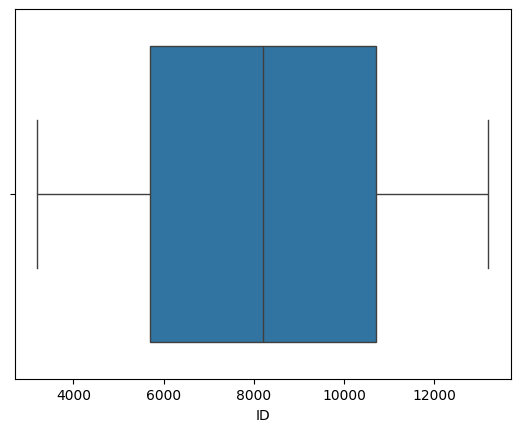

Variable: ID
Number of outliers: 0
Outlier values: []



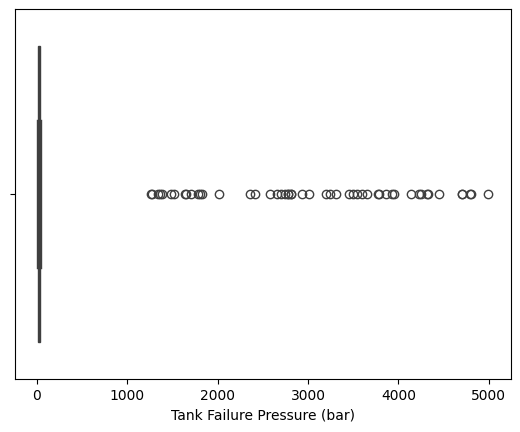

Variable: Tank Failure Pressure (bar)
Number of outliers: 50
Outlier values: [3784.109934688679, 2782.8240780949955, 3928.614232014652, 2809.9789590700293, 1488.046489582861, 4796.894537767495, 2932.132044936735, 4807.927645109845, 2416.5252476659507, 3248.3366612663685, 1342.2427062676618, 3658.176623556812, 3307.579511537497, 3863.996917397343, 1270.544969405257, 1514.882705196757, 1645.9893405224889, 4228.578526733897, 1641.349062207183, 2806.3479845498955, 4330.275514448667, 3013.9066412982206, 1800.7222647556684, 3542.381198879034, 1782.1092254333737, 4995.61640633231, 1257.5238084823843, 3456.660743625387, 3498.013148823286, 4252.776511224362, 4451.8873681408, 2777.8527586326154, 3200.9022276517503, 3594.42910776538, 2013.7032963445, 2660.324093895125, 2698.032495894673, 4315.554684065175, 1701.7362000726098, 2742.2567825516226, 1358.4067073134495, 4142.775104457922, 1823.7113123566005, 2584.5139356885597, 4702.296094966932, 3779.944996809472, 4703.63723680928, 3957.1373752363934

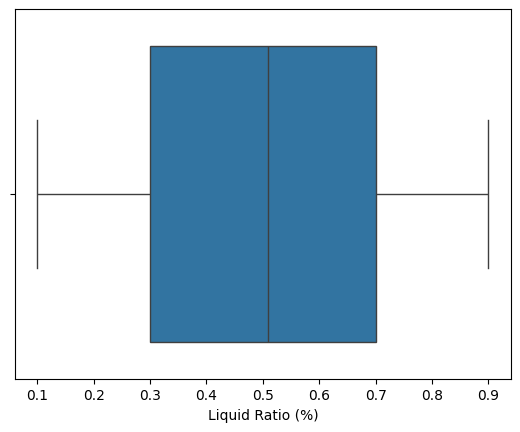

Variable: Liquid Ratio (%)
Number of outliers: 0
Outlier values: []



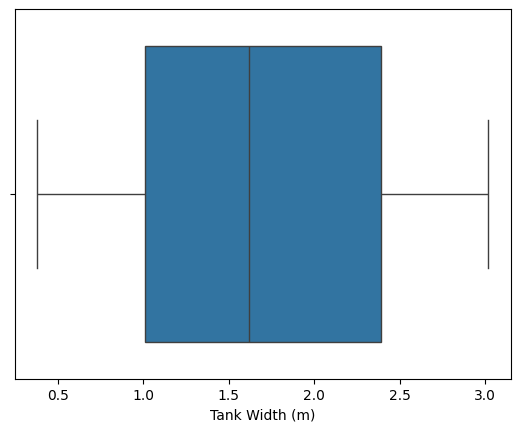

Variable: Tank Width (m)
Number of outliers: 0
Outlier values: []



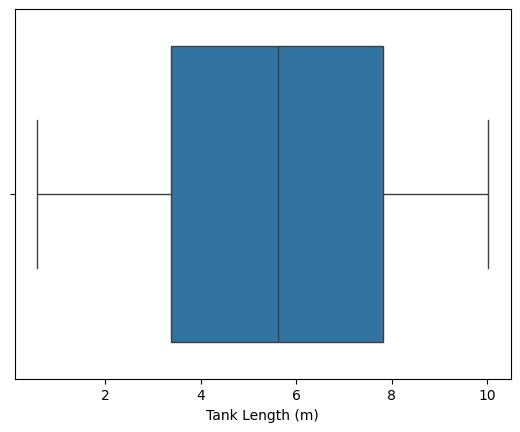

Variable: Tank Length (m)
Number of outliers: 0
Outlier values: []



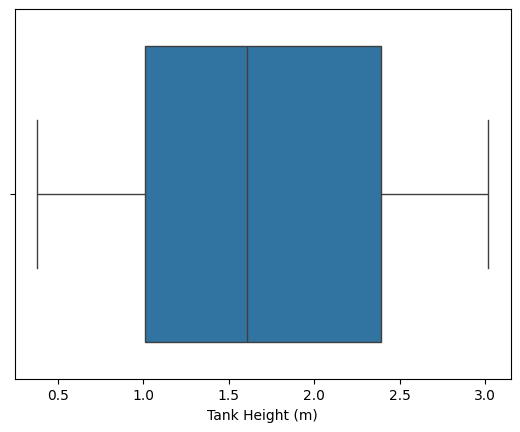

Variable: Tank Height (m)
Number of outliers: 0
Outlier values: []



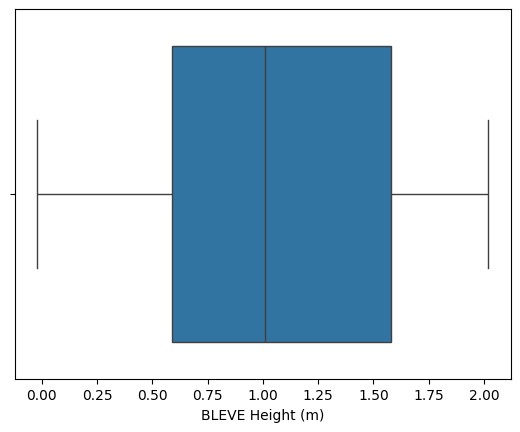

Variable: BLEVE Height (m)
Number of outliers: 0
Outlier values: []



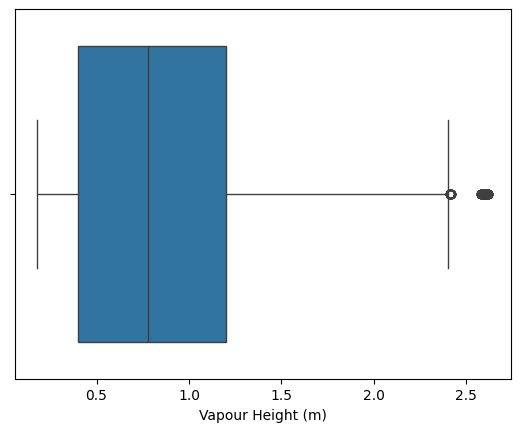

Variable: Vapour Height (m)
Number of outliers: 71
Outlier values: [2.41, 2.42, 2.42, 2.41, 2.41, 2.42, 2.42, 2.41, 2.41, 2.41, 2.41, 2.41, 2.41, 2.41, 2.42, 2.42, 2.41, 2.61, 2.59, 2.59, 2.58, 2.61, 2.61, 2.62, 2.61, 2.59, 2.6, 2.59, 2.61, 2.61, 2.61, 2.58, 2.62, 2.58, 2.59, 2.6, 2.58, 2.61, 2.62, 2.61, 2.61, 2.62, 2.6, 2.58, 2.58, 2.6, 2.6, 2.59, 2.6, 2.61, 2.58, 2.62, 2.59, 2.58, 2.61, 2.59, 2.6, 2.61, 2.61, 2.59, 2.6, 2.59, 2.59, 2.62, 2.58, 2.62, 2.62, 2.6, 2.6, 2.62, 2.61]



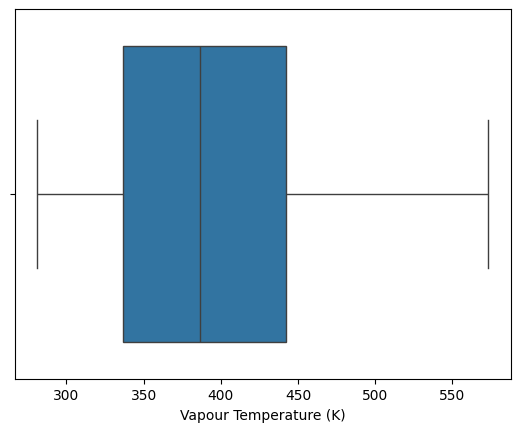

Variable: Vapour Temperature (K)
Number of outliers: 0
Outlier values: []



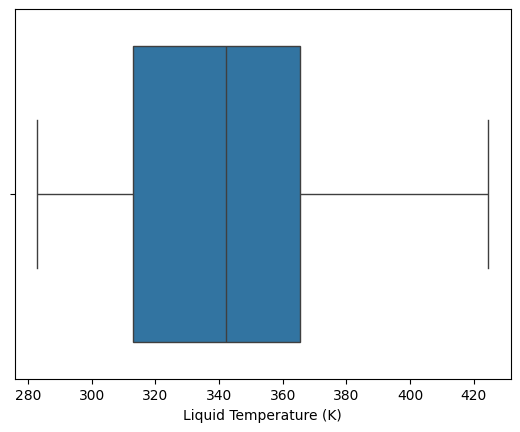

Variable: Liquid Temperature (K)
Number of outliers: 0
Outlier values: []



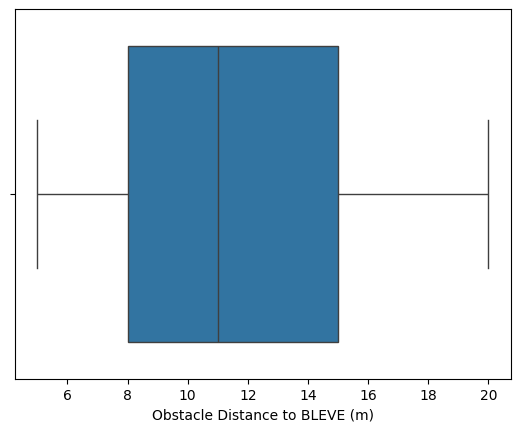

Variable: Obstacle Distance to BLEVE (m)
Number of outliers: 0
Outlier values: []



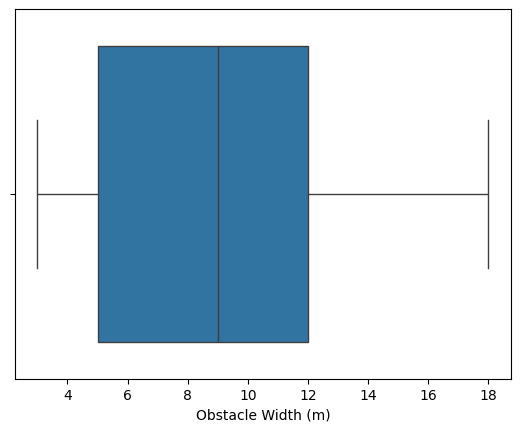

Variable: Obstacle Width (m)
Number of outliers: 0
Outlier values: []



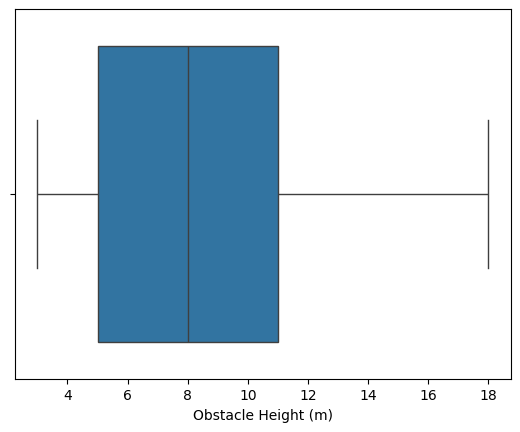

Variable: Obstacle Height (m)
Number of outliers: 0
Outlier values: []



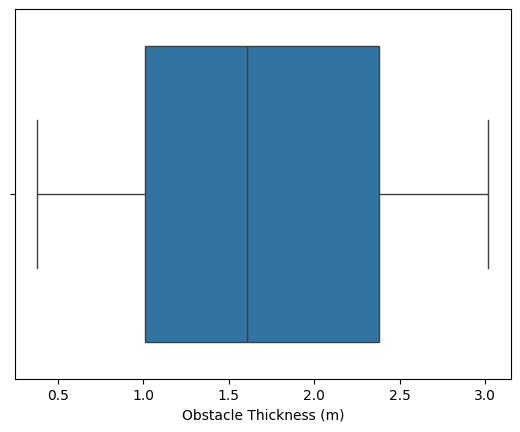

Variable: Obstacle Thickness (m)
Number of outliers: 0
Outlier values: []



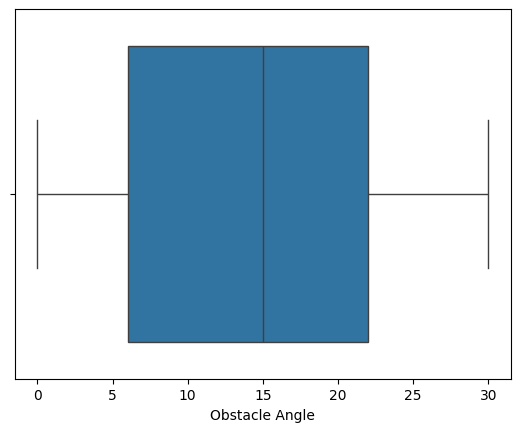

Variable: Obstacle Angle
Number of outliers: 0
Outlier values: []



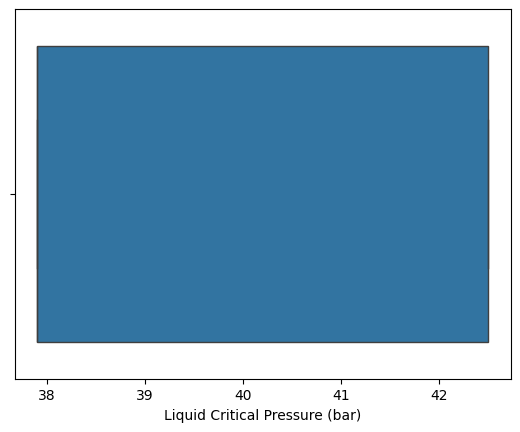

Variable: Liquid Critical Pressure (bar)
Number of outliers: 0
Outlier values: []



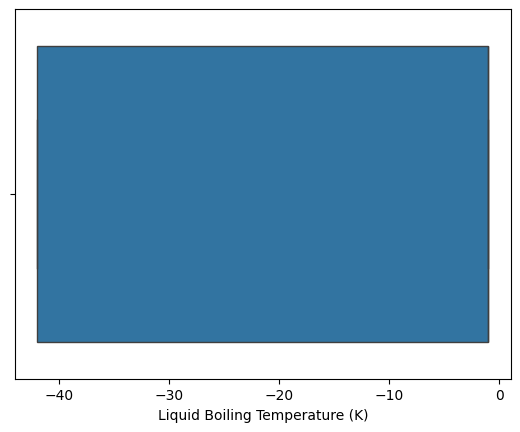

Variable: Liquid Boiling Temperature (K)
Number of outliers: 0
Outlier values: []



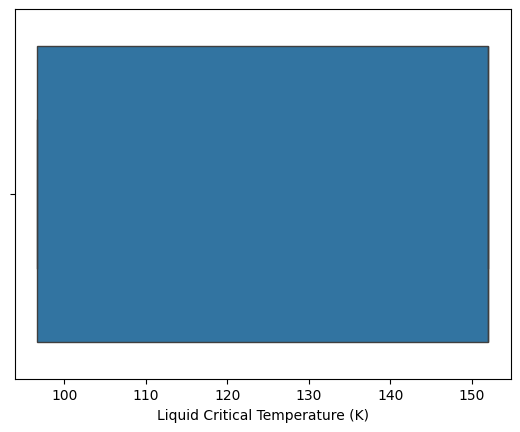

Variable: Liquid Critical Temperature (K)
Number of outliers: 0
Outlier values: []



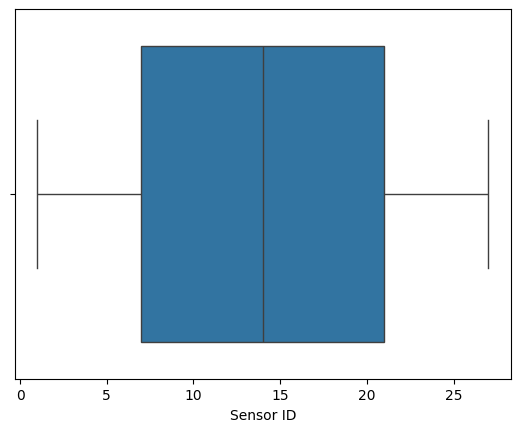

Variable: Sensor ID
Number of outliers: 0
Outlier values: []



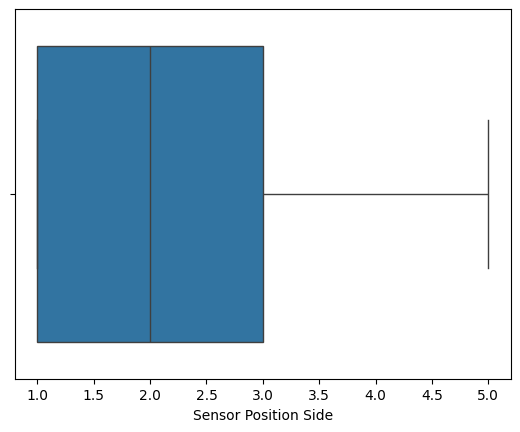

Variable: Sensor Position Side
Number of outliers: 0
Outlier values: []



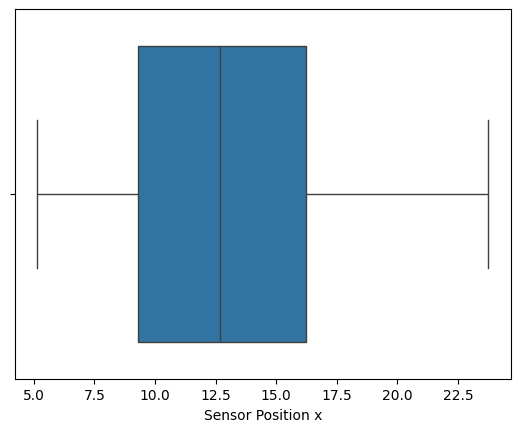

Variable: Sensor Position x
Number of outliers: 0
Outlier values: []



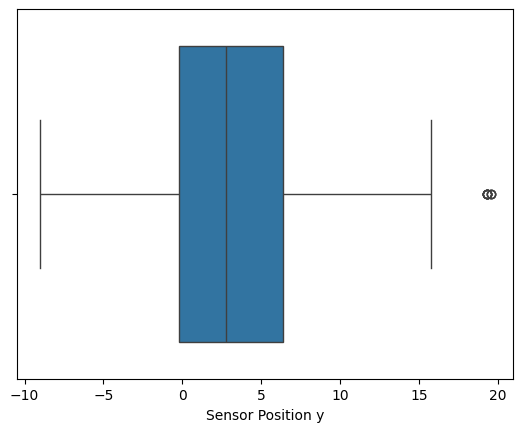

Variable: Sensor Position y
Number of outliers: 10
Outlier values: [19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.55, 19.55, 19.55]



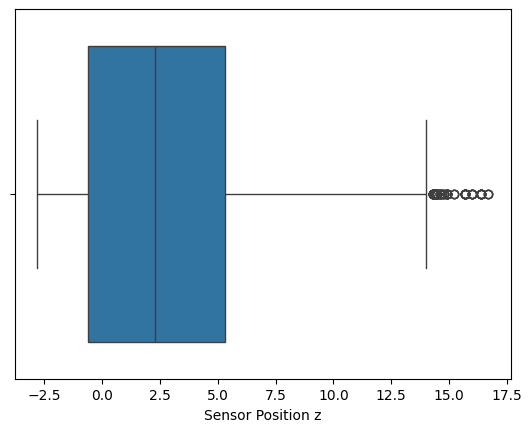

Variable: Sensor Position z
Number of outliers: 91
Outlier values: [15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 16.0, 16.0, 16.0, 15.7, 16.4, 16.4, 16.4, 16.4, 16.4, 16.4, 16.4, 16.7, 16.7, 16.7, 16.4, 14.3, 14.3, 14.3, 14.3, 14.3, 14.3, 14.3, 14.3, 14.3, 14.3, 14.6, 14.6, 14.6, 14.3, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 16.0, 16.0, 16.0, 15.7, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.8, 14.8, 14.8, 14.5, 14.3, 14.3, 14.3, 14.3, 14.3, 14.3, 14.3, 14.6, 14.6, 14.6, 14.3, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 15.2, 15.2, 15.2, 14.9, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.7, 14.7, 14.7, 14.4]



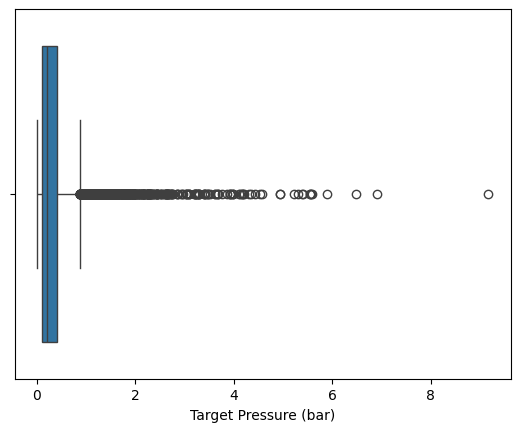

Variable: Target Pressure (bar)
Number of outliers: 878
Outlier values: [0.8849386, 1.7216617, 2.1539905, 0.97187823, 0.9463557, 1.5764886, 1.1329296, 1.0950158, 0.93266124, 1.1147605, 1.0850644, 0.94189018, 0.89837462, 0.8947804, 1.3622419, 1.3189343, 1.1878564, 1.240878, 1.1946421, 0.90344602, 0.96300608, 0.97081274, 0.96706533, 1.3575356, 1.2795581, 1.1394135, 1.1392401, 1.1273552, 1.0636746, 1.260217, 1.2372607, 1.1299289, 0.94121057, 0.93782228, 0.88467461, 3.2339706, 3.1027727, 2.7772834, 2.6297746, 2.521035, 2.2429512, 1.4032309, 1.3856995, 1.298144, 1.2799139, 1.2662722, 1.20026, 0.88615382, 1.1348062, 1.1267992, 1.0491883, 1.3965398, 1.3652344, 1.259058, 6.4926662, 4.5788417, 2.7116487, 6.9162183, 4.945827, 2.5856404, 2.6657283, 1.8461764, 1.2416699, 1.9127796, 1.8394998, 1.4373738, 1.1530418, 1.1881745, 1.0635511, 1.2980168, 1.1586348, 1.072975, 0.95770532, 0.97658294, 0.9040851, 1.0983508, 1.0180588, 2.3210149, 1.0880039, 0.9473021, 1.8417994, 1.2216043, 0.89846909, 0.960945

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each variable in train_set
for col in train_set.columns:
    if train_set[col].dtype != 'bool':  # Check if the column is not boolean
        # Create a boxplot for the current variable
        sns.boxplot(x=train_set[col])
        plt.show()

        # Calculate the IQR and outlier boundaries
        q1 = train_set[col].quantile(0.25)
        q3 = train_set[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Count the number of outliers
        outliers = train_set[((train_set[col] < lower_bound) | (train_set[col] > upper_bound))]
        outlier_count = len(outliers)

        # Print information about outliers for the current variable
        print(f"Variable: {col}")
        print(f"Number of outliers: {outlier_count}")
        print(f"Outlier values: {outliers[col].to_list()}")
        print()
    else:
        print(f"Skipping outlier analysis for boolean column: {col}")

In [27]:
# five-number summaries to see the spread of features that have been shown to have outliers
train_set.describe()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
count,9995.000000,9993.000000,9991.000000,9991.000000,9991.000000,9992.000000,9990.000000,9991.000000,9973.000000,9973.000000,...,9992.000000,9970.000000,9972.000000,9970.000000,9992.000000,9992.000000,9993.000000,9992.000000,9991.000000,9990.000000
mean,8202.387294,37.974523,0.504093,1.696896,5.597913,1.673653,1.023595,0.845946,396.801937,343.469890,...,14.598579,40.099418,-20.591356,125.542528,14.008807,2.334668,12.907654,2.984738,3.080352,0.360235
std,2886.588002,226.194645,0.228182,0.764819,2.597377,0.751635,0.575623,0.536482,71.868348,35.522333,...,9.238729,2.297915,20.480880,27.625657,7.790773,1.333750,4.159288,4.712655,4.211532,0.494853
min,3203.000000,4.920000,0.100000,0.380000,0.580000,0.380000,-0.020000,0.180000,281.210000,282.950000,...,0.000000,37.900000,-42.000000,96.700000,1.000000,1.000000,5.150000,-9.050000,-2.800000,0.016098
25%,5703.500000,13.730000,0.300000,1.010000,3.380000,1.010000,0.590000,0.400000,336.650000,312.830000,...,6.000000,37.900000,-42.000000,96.700000,7.000000,1.000000,9.300000,-0.200000,-0.600000,0.102155
50%,8203.000000,22.960000,0.510000,1.620000,5.620000,1.610000,1.010000,0.780000,386.800000,342.330000,...,15.000000,37.900000,-1.000000,152.000000,14.000000,2.000000,12.700000,2.800000,2.300000,0.206200
75%,10701.500000,32.230000,0.700000,2.390000,7.810000,2.390000,1.580000,1.200000,442.020000,365.320000,...,22.000000,42.500000,-1.000000,152.000000,21.000000,3.000000,16.250000,6.400000,5.300000,0.412459
max,13202.000000,4995.616406,0.900000,3.020000,10.020000,3.020000,2.020000,2.620000,573.300000,424.600000,...,30.000000,42.500000,-1.000000,152.000000,27.000000,5.000000,23.750000,19.550000,16.700000,9.170477


The outliers in Tank Failure Pressure(bar) feature are very large and very far from the central spread of the feature. These could affect the model, so I opted to remove them

In [28]:
# dropping the outliers from the 'Tank Failure Pressure' feature
train_set = train_set.drop(train_set[train_set['Tank Failure Pressure (bar)'].isin(outliers)].index)

In [29]:
# checking how the dataframe has changed
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               9995 non-null   float64
 1   Tank Failure Pressure (bar)      9993 non-null   float64
 2   Liquid Ratio (%)                 9991 non-null   float64
 3   Tank Width (m)                   9991 non-null   float64
 4   Tank Length (m)                  9991 non-null   float64
 5   Tank Height (m)                  9992 non-null   float64
 6   BLEVE Height (m)                 9990 non-null   float64
 7   Vapour Height (m)                9991 non-null   float64
 8   Vapour Temperature (K)           9973 non-null   float64
 9   Liquid Temperature (K)           9973 non-null   float64
 10  Obstacle Distance to BLEVE (m)   9992 non-null   float64
 11  Obstacle Width (m)               9994 non-null   float64
 12  Obstacle Height (m)     

Clearly, 50 entries have been removed from the dataset.

DROPPING THE SAME OUTLIERS FROM TEST SET

Drop the same entries that fall under outliers from the test set

In [30]:
# dropping the outliers from the 'Tank Failure Pressure' feature
test_set = test_set.drop(test_set[test_set['Tank Failure Pressure (bar)'].isin(outliers)].index)

In [31]:
# checking how the dataframe has changed
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3203 non-null   int64  
 1   Tank Failure Pressure (bar)      3203 non-null   float64
 2   Liquid Ratio (%)                 3203 non-null   float64
 3   Tank Width (m)                   3203 non-null   float64
 4   Tank Length (m)                  3203 non-null   float64
 5   Tank Height (m)                  3203 non-null   float64
 6   BLEVE Height (m)                 3203 non-null   float64
 7   Vapour Height (m)                3203 non-null   float64
 8   Vapour Temperature (K)           3203 non-null   float64
 9   Liquid Temperature (K)           3203 non-null   float64
 10  Obstacle Distance to BLEVE (m)   3203 non-null   int64  
 11  Obstacle Width (m)               3203 non-null   int64  
 12  Obstacle Height (m) 

CORRELATION MATRIX

Now I want to see how the features correlate to each other and to the target variable. I'll be using the correlation matrix plot to visualize this effect  


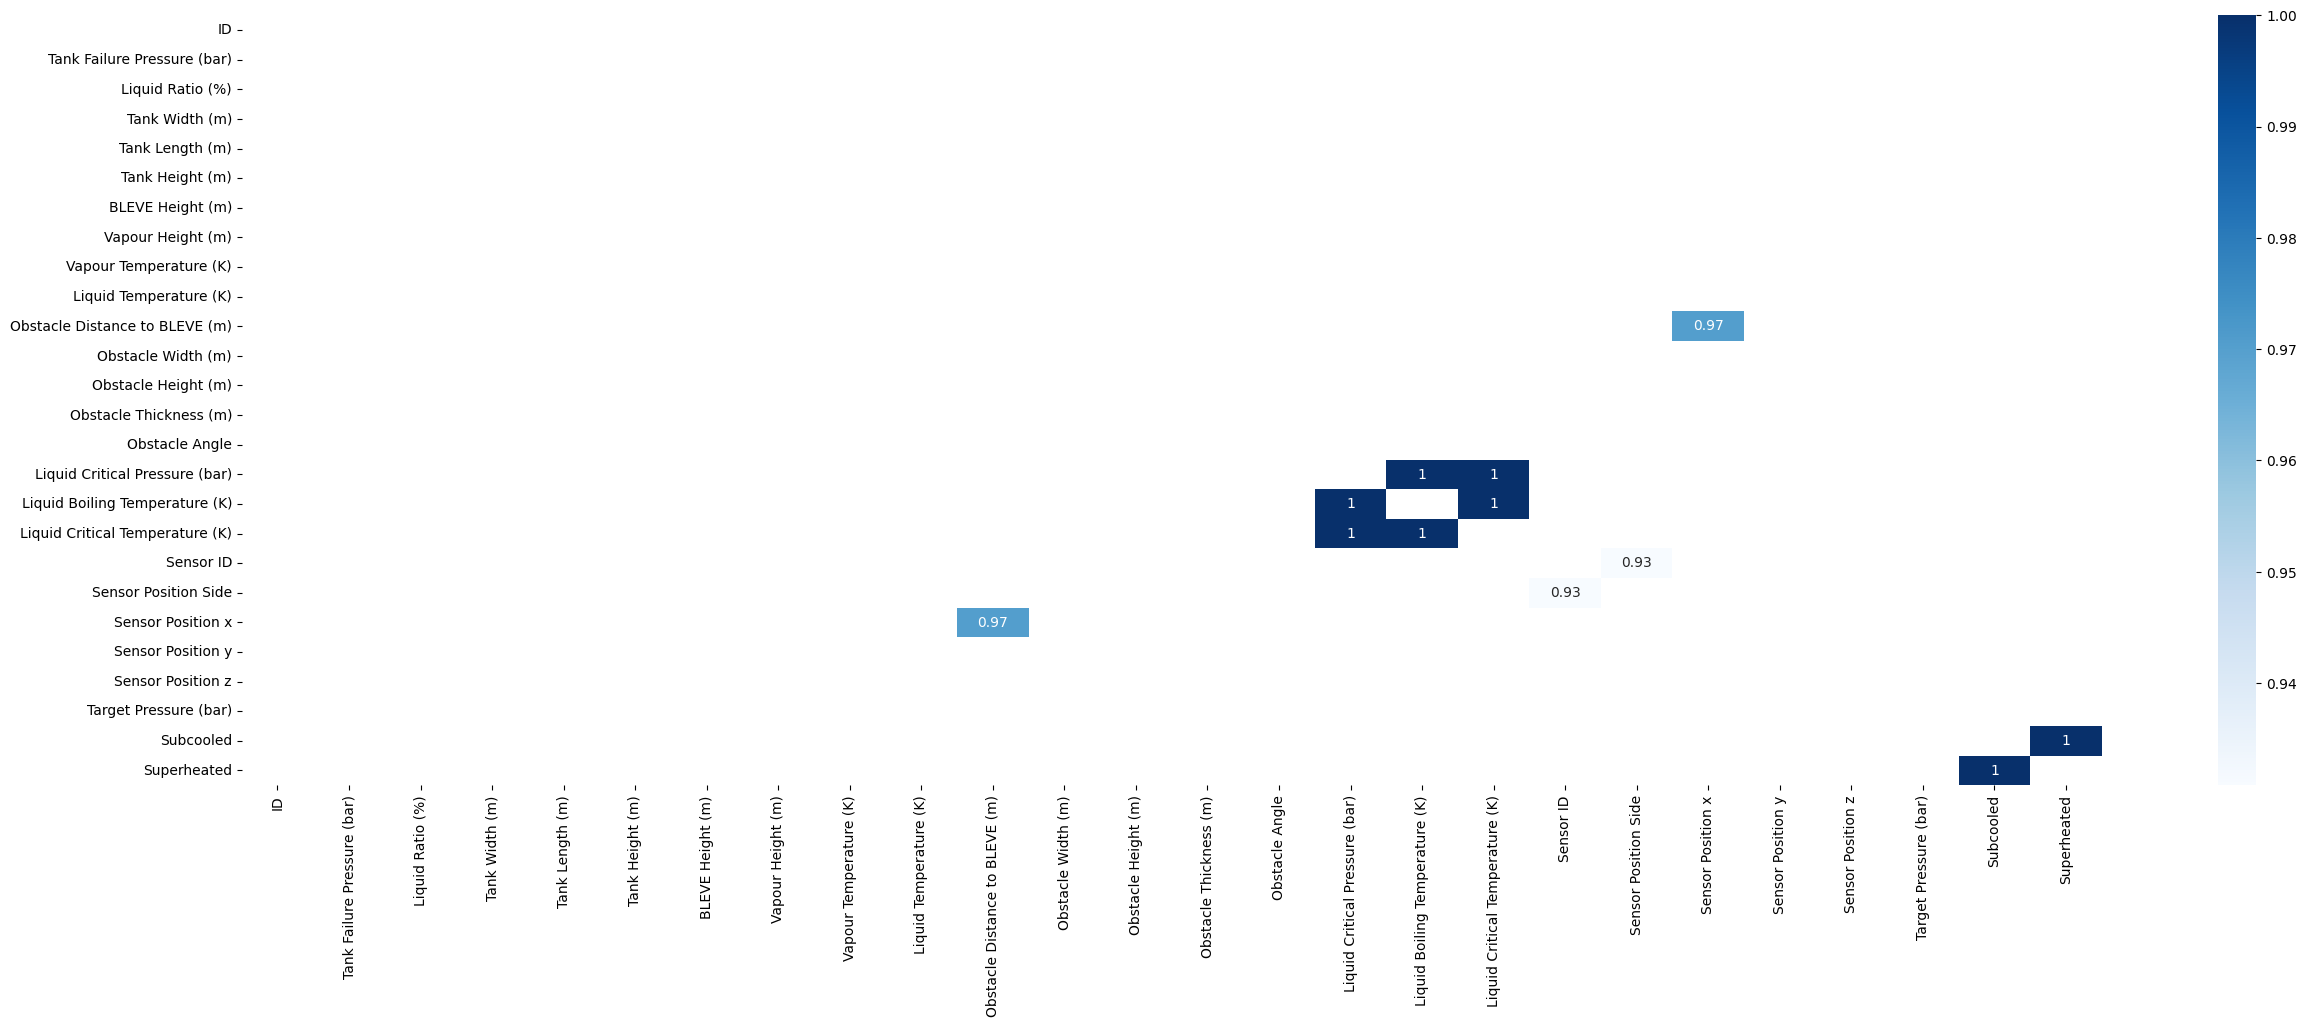

In [32]:
# plotting the correlation matrix
corr_plot = train_set.corr().abs()
threshold = 0.7 # for better readability of the plot, I used a threshold of correlation values to be displayed

threshold_plot = corr_plot[(corr_plot >= threshold) & (corr_plot != 1.000)]

plt.figure(figsize=(30,10))
sns.heatmap(threshold_plot, annot=True, cmap="Blues")
plt.show()

To avoid multicollinearity issues, I decided to drop some of the features with very high correlation between themselves

In [33]:
# define the features with high correlation that I want to remove
unwanted = ['Sensor ID','ID', 'Liquid Critical Pressure (bar)', 'Liquid Boiling Temperature (K)', 'Obstacle Distance to BLEVE (m)']

# drop the features from training and testing sets
train_set = train_set.drop(unwanted, axis=1)
test_set = test_set.drop(unwanted, axis=1)

In [34]:
# checking the datasets after the change
# training set
train_set.head(5)

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),...,Obstacle Thickness (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Subcooled,Superheated
0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,11.0,...,0.62,13.0,152.0,2.0,12.15,7.90,10.7,0.199929,False,True
1,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,11.0,...,0.62,13.0,152.0,3.0,12.50,-2.95,-1.9,0.435681,False,True
2,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,11.0,...,0.60,13.0,152.0,3.0,12.50,-2.95,4.4,0.264031,False,True
3,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,11.0,...,0.60,13.0,152.0,3.0,12.50,-2.95,10.7,0.270576,False,True
4,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,11.0,...,0.62,13.0,152.0,4.0,12.50,-2.70,11.0,0.204675,False,True


In [35]:
# testing set
test_set.head(5)

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Subcooled,Superheated
0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,0.6,1,152.0,1,12.05,-5.6,-1.0,False,True
1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,0.6,1,152.0,1,12.05,-5.6,1.3,False,True
2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,0.6,1,152.0,1,12.05,-5.6,3.6,False,True
3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,0.6,1,152.0,1,12.05,0.2,-1.0,False,True
4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,12,5,0.6,1,152.0,1,12.05,0.2,1.3,False,True


Now back to the missing values.

In [36]:
# checking the number of missing values in each feature
missing = train_set.isnull().sum().sort_values(ascending=False)
# Printing them in descending order
print(missing)

Liquid Critical Temperature (K)    30
Liquid Temperature (K)             27
Vapour Temperature (K)             27
BLEVE Height (m)                   10
Target Pressure (bar)              10
Liquid Ratio (%)                    9
Sensor Position z                   9
Tank Width (m)                      9
Tank Length (m)                     9
Vapour Height (m)                   9
Tank Height (m)                     8
Sensor Position y                   8
Obstacle Angle                      8
Sensor Position Side                8
Tank Failure Pressure (bar)         7
Obstacle Thickness (m)              7
Sensor Position x                   7
Obstacle Width (m)                  6
Obstacle Height (m)                 6
Subcooled                           0
Superheated                         0
dtype: int64


The no.of missing values here is very little compared to the no.of entries in the datasets. So I chose to impute the missing values for each feature with their median values.

In [37]:
# using SimpleImputer to assign median values to Na values
imputed = SimpleImputer(missing_values= np.nan, strategy='median')
imputed.fit(train_set) # fitting the imputed data into training data
train_set = pd.DataFrame(data=imputed.transform(train_set), columns = train_set.columns)

# re-checking for missing values
# checking the number of missing values in each feature
missing = train_set.isnull().sum().sort_values(ascending=False)
# Printing them in descending order
print(missing)

Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Liquid Critical Temperature (K)    0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
Subcooled                          0
Superheated                        0
dtype: int64


So now none of the features have missing values. They have been replaced with their respective feature median values.

IMPUTING THE MISSING VALUES IN THE TEST SET TOO

In [38]:
# checking the number of missing values in each feature
missing2 = test_set.isnull().sum().sort_values(ascending=False)
# Printing them in descending order
print(missing2)

Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Liquid Critical Temperature (K)    0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Subcooled                          0
Superheated                        0
dtype: int64


In [39]:
# using SimpleImputer to assign median values to Na values
imputed2 = SimpleImputer(missing_values= np.nan, strategy='median')
imputed2.fit(test_set) # fitting the imputed data into test data
test_set = pd.DataFrame(data=imputed2.transform(test_set), columns = test_set.columns)

# re-checking for missing values
# checking the number of missing values in each feature
missing2 = test_set.isnull().sum().sort_values(ascending=False)
# Printing them in descending order
print(missing2)

Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Liquid Critical Temperature (K)    0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Subcooled                          0
Superheated                        0
dtype: int64


FEATURE ENGINEERING

As soon as I saw the variables, I could pick out at least 3 features that I could engineer from the given variables: obstacle volume, tank volume, and the ratio of vapor to liquid temperature.
For feature engineering, I first initialised the baseline and the engineered data, then calculated their respective MAE scores to see how the engineered data fits, then I assigned the engineered data to my dataset.


In [40]:
# to initialise the baseline and engineered data
# separate the target variable from training set
base_x = train_set.drop('Target Pressure (bar)', axis = 1)  # base = baseline
base_y = train_set['Target Pressure (bar)'] # store target variable in base_y
base_x = base_x.head(1000)
base_y = base_y.head(1000)

# create copies of base_x and base_y
eng_x = base_x  # eng = engineered
eng_y = base_y

print(base_y) #print target variable
print(base_x) #print other variables

0      0.199929
1      0.435681
2      0.264031
3      0.270576
4      0.204675
         ...   
995    0.362077
996    0.344674
997    0.272170
998    0.285954
999    0.260318
Name: Target Pressure (bar), Length: 1000, dtype: float64
     Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0                           7.32              0.42            2.42   
1                           7.18              0.42            2.39   
2                           7.32              0.41            2.39   
3                           7.26              0.42            2.40   
4                           7.32              0.42            2.40   
..                           ...               ...             ...   
995                        37.20              0.54            1.79   
996                        37.05              0.54            1.80   
997                        37.06              0.53            1.79   
998                        37.06              0.54            1.78

I then used a RandomForestRegressor to get the baseline and engineered data MAE scores

In [41]:
# setting up baseline model and checking its MAE
base = RandomForestRegressor(criterion="absolute_error", random_state=0)  # used Random Forest regressor
base_score = cross_val_score(base, base_x, base_y, cv=5, scoring = "neg_mean_absolute_error") # performing 5-fold cross validation to evaluate model performance
base_score = -1 * base_score.mean() # multiply by -1 to get actual positive MAE score
print(f"Baseline MAE Score: {base_score:.4}")

Baseline MAE Score: 0.1772


Now for the featured data

In [42]:
# creating new features from existing variables
# obstacle volume
eng_x["Obstacle Volume (KL)"] = eng_x["Obstacle Width (m)"] * eng_x["Obstacle Height (m)"] * eng_x["Obstacle Thickness (m)"]
# tank volume
eng_x["Tank Volume (KL)"] = eng_x["Tank Width (m)"] * eng_x["Tank Length (m)"] * eng_x["Tank Height (m)"]
# vapour liquid temp ratio
eng_x["Vapour Liquid Temp Ratio"] = eng_x['Liquid Temperature (K)']/eng_x['Vapour Temperature (K)']

# list of features to be dropped to avoid redundancy now that we have created new features
engdrop_x = ["Obstacle Width (m)","Obstacle Height (m)","Obstacle Thickness (m)","Tank Width (m)" , "Tank Length (m)", "Tank Height (m)", "Liquid Temperature (K)", "Vapour Temperature (K)"]
eng_x = eng_x.drop(engdrop_x, axis=1) #drop them from the list of variables in eng_x

# model a Random Forest regressor to get MAE scores
rfmodel = RandomForestRegressor(criterion = "absolute_error", random_state = 0)
score = cross_val_score(rfmodel, eng_x, eng_y, cv=5, scoring="neg_mean_absolute_error")
score = -1 * score.mean() # multiply by -1 to get the actual MAE score

print(f"MAE Score with Engineered Features: {score: .4}")


MAE Score with Engineered Features:  0.1687


Now that we've seen how the engineered data would perform, let's implement the engineered features into the actual datasets

In [43]:
# creating new features from the training_set variables
# tank volume
train_set["Tank Volume (KL)"] = train_set["Tank Width (m)"] * train_set["Tank Length (m)"] * train_set["Tank Height (m)"]
# obstacle volume
train_set["Obstacle Volume (KL)"] = train_set["Obstacle Width (m)"] * train_set["Obstacle Height (m)"] * train_set["Obstacle Thickness (m)"]
# vapour liquid temp ratio
train_set["Vapour Liquid Temp Ratio"] = train_set["Liquid Temperature (K)"]/train_set["Vapour Temperature (K)"]

# creating new features from the test_set variables
# tank volume
test_set["Tank Volume (KL)"] = test_set["Tank Width (m)"] * test_set["Tank Length (m)"] * test_set["Tank Height (m)"]
# obstacle volume
test_set["Obstacle Volume (KL)"] = test_set["Obstacle Width (m)"] * test_set["Obstacle Height (m)"] * test_set["Obstacle Thickness (m)"]
# vapour liquid temp ratio
test_set["Vapour Liquid Temp Ratio"] = test_set['Liquid Temperature (K)']/test_set['Vapour Temperature (K)']

# list of features to be dropped
droplist = ["Obstacle Width (m)","Obstacle Height (m)","Obstacle Thickness (m)","Tank Width (m)" , "Tank Length (m)", "Tank Height (m)", "Vapour Temperature (K)","Liquid Temperature (K)"]

# dropping the features from both training and test sets
train_set = train_set.drop(droplist, axis=1)
test_set = test_set.drop(droplist, axis=1)

In [44]:
# checking the new training and testing datasets
train_set.head(5) # training set

,Tank Failure Pressure (bar),Liquid Ratio (%),BLEVE Height (m),Vapour Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Subcooled,Superheated,Tank Volume (KL),Obstacle Volume (KL),Vapour Liquid Temp Ratio
0,7.32,0.42,1.79,0.60,13.0,152.0,2.0,12.15,7.90,10.7,0.199929,0.0,1.0,13.043800,88.66,0.675721
1,7.18,0.42,1.81,0.59,13.0,152.0,3.0,12.50,-2.95,-1.9,0.435681,0.0,1.0,13.010921,88.66,0.677716
2,7.32,0.41,1.78,0.62,13.0,152.0,3.0,12.50,-2.95,4.4,0.264031,0.0,1.0,12.858200,85.80,0.677992
3,7.26,0.42,1.81,0.61,13.0,152.0,3.0,12.50,-2.95,10.7,0.270576,0.0,1.0,12.984000,85.80,0.678415
4,7.32,0.42,1.79,0.62,13.0,152.0,4.0,12.50,-2.70,11.0,0.204675,0.0,1.0,13.243680,88.66,0.677521


In [45]:
# checking the new training and testing datasets
test_set.head(5) # test set

,Tank Failure Pressure (bar),Liquid Ratio (%),BLEVE Height (m),Vapour Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Subcooled,Superheated,Tank Volume (KL),Obstacle Volume (KL),Vapour Liquid Temp Ratio
0,16.8,0.336426,0.4,1.6,1.0,152.0,1.0,12.05,-5.6,-1.0,0.0,1.0,52.976,36.0,0.993075
1,16.8,0.336426,0.4,1.6,1.0,152.0,1.0,12.05,-5.6,1.3,0.0,1.0,52.976,36.0,0.993075
2,16.8,0.336426,0.4,1.6,1.0,152.0,1.0,12.05,-5.6,3.6,0.0,1.0,52.976,36.0,0.993075
3,16.8,0.336426,0.4,1.6,1.0,152.0,1.0,12.05,0.2,-1.0,0.0,1.0,52.976,36.0,0.993075
4,16.8,0.336426,0.4,1.6,1.0,152.0,1.0,12.05,0.2,1.3,0.0,1.0,52.976,36.0,0.993075


MODEL TRAINING

I went with the following models: (1)SVM (2)RandomForest (3)XGBoost

Before creating the models, I created a function that contains the metrics I will use to evaluate the model performance: R^2 value and Mean Absolute Prediction Error(MAPE) score.

In [46]:
# creating a function to evaluate model performance
def model_eval(model , test_variables, test_labels):
    predictions = model.predict(test_variables)
    mape = mean_absolute_percentage_error(test_labels,predictions)
    r2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAPE score: ',mape)
    print('R^2 value: ',r2)

This function will give us the metrics for evaluating the models' performances once we have defined them and trained them on the data.


SUPPORT VECTOR REGRESSOR

Starting with Support Vector Regressor first

In [47]:
# initialising data for Support Vector regressor
# training set
SVRtrain_X = train_set.drop('Target Pressure (bar)', axis = 1) # separate other features from target variable
SVRtrain_Y = train_set['Target Pressure (bar)'] # isolate the target variable
# make a copy for test set
SVRtest_X  = test_set

# initialising the standard scaler
scaler = StandardScaler()

scaler.fit(SVRtrain_X)  # Fit scaler on training data only
SVRtrain_X = pd.DataFrame(scaler.transform(SVRtrain_X), columns=SVRtrain_X.columns)
SVRtest_X = pd.DataFrame(scaler.transform(SVRtest_X), columns=SVRtest_X.columns)

SVRtest_X.head(3)

,Tank Failure Pressure (bar),Liquid Ratio (%),BLEVE Height (m),Vapour Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Subcooled,Superheated,Tank Volume (KL),Obstacle Volume (KL),Vapour Liquid Temp Ratio
0,-0.093603,-0.735185,-1.083911,1.406357,-1.472607,0.955011,-1.000913,-0.20625,-1.822423,-0.969155,-1.315296,1.315296,2.979955,-0.856813,0.577335
1,-0.093603,-0.735185,-1.083911,1.406357,-1.472607,0.955011,-1.000913,-0.20625,-1.822423,-0.422771,-1.315296,1.315296,2.979955,-0.856813,0.577335
2,-0.093603,-0.735185,-1.083911,1.406357,-1.472607,0.955011,-1.000913,-0.20625,-1.822423,0.123614,-1.315296,1.315296,2.979955,-0.856813,0.577335


Scaling ensures all features contribute equally to distance calculations, leading to better model performance because SVM heavily relies on distances between data points for classification or regression.

We then: (1) check and tune hyperparameters (2) search for the best parameters for the model (3) compare the model's performance with base parameters against the best parameters (4) use the model to make predictions on the test data

In [48]:
# checking and tuning hyperparameters for support vector regressor
kernel = ['linear', 'rbf', 'poly'] # define the kernel
C = [1.5, 10]
gamma = [1e-7, 1e-4]
epsilon = [0.1,0.2,0.5,0.3]


SVR_grid ={'kernel': kernel,
            'C': C,
            'gamma': gamma,
            'epsilon': epsilon}


In [49]:
# random searching for base SVR parameters
svr=SVR() #initialize SVR model object
# define RandomSearchCV for tuning
svr_search = RandomizedSearchCV(estimator = svr,param_distributions = SVR_grid, n_iter = 10, cv = 3, verbose =2, random_state =42, n_jobs =-1)
svr_search.fit(SVRtrain_X, SVRtrain_Y) # fit the model to training subset

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1.5, 10],
                                        'epsilon': [0.1, 0.2, 0.5, 0.3],
                                        'gamma': [1e-07, 0.0001],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, verbose=2)

In [50]:
# now for the best parameters
svr_search.best_params_

{'kernel': 'linear', 'gamma': 1e-07, 'epsilon': 0.5, 'C': 1.5}

In [51]:
# checking the best model
svr_search.best_estimator_

SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')

Now we've got the list of best parameters for the model. To check the performance of the model with the base parameters and compare it to the performance with best parameters:

In [52]:
# checking performance with base parameters
base_SVR = SVR()  # initialize model object
base_SVR.fit(SVRtrain_X, SVRtrain_Y) # fit the model to training subset
SVRbase_acc = model_eval(base_SVR, SVRtrain_X, SVRtrain_Y) #evaluate the accuracy/performance of the model

Model Performance
MAPE score:  0.438819677141386
R^2 value:  0.698187166223555


In [53]:
# checking performance with best parameters
best_SVR = SVR(kernel= 'linear', gamma=1e-07, epsilon=0.5, C= 1.5)  # define model object with best parameters
best_SVR.fit(SVRtrain_X, SVRtrain_Y)  # fit the model to training subset
SVRbest_acc = model_eval(base_SVR, SVRtrain_X, SVRtrain_Y)  #evaluate the accuracy/performance of the model

Model Performance
MAPE score:  0.438819677141386
R^2 value:  0.698187166223555


Now that we have fit the regressor to the training data and assessed performance, let's try and predict the target variable for test data

In [54]:
# predict function using the regressor model on test set
SVRtest_Y = best_SVR.predict(SVRtest_X)
SVRtest_Y

array([0.93718814, 0.90036743, 0.86354672, ..., 0.30302347, 0.43094108,
       0.33008434])

OUTPUT FILE FORMAT (CSV)

Let's define the format for the output files for all models

In [55]:
# this will be the output csv file format
ids = 3202
array_ids = np.arange(0, ids + 1).reshape(-1,1)
fmt = ["%d","%.6f"]

In [56]:
# output file for the SV Regressor model
np.savetxt("SVRoutput.csv",np.column_stack((array_ids, SVRtest_Y)), delimiter=",", header="ID,Target Pressure (bar)",fmt=fmt)

RANDOM FOREST

Second model is Random Forest

In [57]:
# first initialise the data for the model
# training set
RFtrain_X = train_set.drop('Target Pressure (bar)', axis = 1) # separate other features from target variable
RFtrain_Y = train_set['Target Pressure (bar)'] # isolate the target variable
# make a copy for test set
RFtest_X  = test_set

In [58]:
# next thing is defining and tuning hyperparameters
max_features = ['auto','sqrt']  # how many features at each split
estimators = [int(x) for x in np.linspace(start = 200, stop =3000, num = 10)] #no of trees in the forest

maxidepth = [int(x) for x in np.linspace(10,200, num=10)] # max depth of each tree
maxidepth.append(None)

min_samples_split = [2,5,8,10]  #min no of samples required to split node
min_samples_leaf = [1,2,3,4]  #min no.of samples needed to be a leaf in the tree
bootstrap = [True, False]

#all the hyperparameters
RFgrid = {
            'max_features': max_features,
            'n_estimators': estimators,
            'max_depth': maxidepth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap':bootstrap

          }

In [59]:
# random searching for base RF parameters
rf = RandomForestRegressor()
rf_search = RandomizedSearchCV(estimator = rf,param_distributions = RFgrid, n_iter = 1, cv = 3, verbose =2, random_state =42, n_jobs =-1)
rf_search.fit(RFtrain_X, RFtrain_Y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [200, 511, 822, 1133,
                                                         1444, 1755, 2066, 2377,
                                                         2688, 3000]},
                   random_state=42, verbose=2)

In [60]:
# now for best parameters
rf_search.best_params_


{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 52,
 'bootstrap': True}

In [61]:
# and for best model
rf_search.best_estimator_

RandomForestRegressor(max_depth=52, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=8, n_estimators=200)

In [62]:
# checking performance with base parameters
base_RF = RandomForestRegressor(n_estimators = 10, random_state=42) #initialise model object
base_RF.fit(RFtrain_X, RFtrain_Y) # fit the model to training subset
RFbase_acc = model_eval(base_RF, RFtrain_X, RFtrain_Y) # evaluate the model accuracy

Model Performance
MAPE score:  0.07951458007480854
R^2 value:  0.9764644989435226


In [63]:
# checking performance with best parameters
best_RF = RandomForestRegressor(n_estimators = 200, min_samples_split=8, min_samples_leaf=2, max_features= 'sqrt', max_depth= 52, bootstrap=True)
best_RF.fit(RFtrain_X, RFtrain_Y) # fit the model to training subset
RFbest_acc = model_eval(best_RF, RFtrain_X, RFtrain_Y) # evaluate the model accuracy

Model Performance
MAPE score:  0.1739233181200429
R^2 value:  0.9232720450044857


In [64]:
# checking performance after tuning some hyperparameters
best_RF2 = RandomForestRegressor(n_estimators = 20, min_samples_split=8, min_samples_leaf=4, max_features= 'auto', max_depth= 28, bootstrap=True)
best_RF2.fit(RFtrain_X, RFtrain_Y) # fit the model to training subset
RFbest_acc2 = model_eval(best_RF2, RFtrain_X, RFtrain_Y) # evaluate the model accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Model Performance
MAPE score:  0.12411995037162588
R^2 value:  0.9452235796191203


In [65]:
# checking performance after tuning some hyperparameters
tuned_RF = RandomForestRegressor(n_estimators = 10, min_samples_split=4, min_samples_leaf=4, max_features= 'auto', max_depth= 52, bootstrap=True)
tuned_RF.fit(RFtrain_X, RFtrain_Y) # fit the model to training subset
tunedRF_acc = model_eval(tuned_RF, RFtrain_X, RFtrain_Y) # evaluate the model accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Model Performance
MAPE score:  0.12977582128630016
R^2 value:  0.9416210484192354


It seems the base model has the best performance so far. I could potentially use that for the final prediction.

Now let's try make some predictions with the chosen model. I first wanted to use the model with best parameters

In [66]:
# use the best parameter model to predict the target variable for test data
RFtest_Y = base_RF.predict(RFtest_X)
RFtest_Y

array([0.26700765, 0.27560069, 0.27619114, ..., 0.37604739, 0.46754312,
       0.37693699])

In [67]:
# save output for RF model to CSV file
np.savetxt("newRFoutput.csv",np.column_stack((array_ids, RFtest_Y)), delimiter=",", header="ID,Target Pressure (bar)",fmt=fmt)

NEURAL NETWORK

The last model is a Neural Network. I started by initialising the data

In [68]:
# initialising the data for the model
# training set
nwtrain_Y = train_set['Target Pressure (bar)']  # separate other features from target variable
nwtrain_X = train_set.drop('Target Pressure (bar)', axis = 1) # isolate the target variable
# make a copy for test set
nwtest_X = test_set

scaler.fit(nwtrain_X)  # Fit scaler on training data only
nwtrain_X = pd.DataFrame(scaler.transform(nwtrain_X), columns = nwtrain_X.columns)
nwtest_X = pd.DataFrame(scaler.transform(nwtest_X), columns = nwtest_X.columns)

nwtest_X.head(3)

,Tank Failure Pressure (bar),Liquid Ratio (%),BLEVE Height (m),Vapour Height (m),Obstacle Angle,Liquid Critical Temperature (K),Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Subcooled,Superheated,Tank Volume (KL),Obstacle Volume (KL),Vapour Liquid Temp Ratio
0,-0.093603,-0.735185,-1.083911,1.406357,-1.472607,0.955011,-1.000913,-0.20625,-1.822423,-0.969155,-1.315296,1.315296,2.979955,-0.856813,0.577335
1,-0.093603,-0.735185,-1.083911,1.406357,-1.472607,0.955011,-1.000913,-0.20625,-1.822423,-0.422771,-1.315296,1.315296,2.979955,-0.856813,0.577335
2,-0.093603,-0.735185,-1.083911,1.406357,-1.472607,0.955011,-1.000913,-0.20625,-1.822423,0.123614,-1.315296,1.315296,2.979955,-0.856813,0.577335


In [69]:
# defining hyperparameters
# create a Sequential neural network
nw_model = Sequential([
      Dense(64, activation='relu', input_shape=(nwtrain_X.shape[1],)),  #first layer with 64 neurons
      Dense(128, activation='relu'), # second hidden layer with 128 neurons
      Dropout(0.2), # 20% drop
      Dense(64,activation='relu'),
      Dense(1)  # output layer
])

# define the optimizer for training
optimizer = RMSprop(learning_rate=0.001)

# compile the model with loss function
nw_model.compile(loss='mean_absolute_percentage_error',optimizer=optimizer,metrics=['mae'])
nw_model.summary()

earlyStopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  #early stopping callback
# training the model using train_set
nw_model.fit(nwtrain_X, nwtrain_Y, epochs=50, batch_size=32, validation_split = 0.2, callbacks=[earlyStopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
250/250 [

In [70]:
nwtest_Y = nw_model.predict(nwtest_X)
nwtest_Y

101/101 [==============================] - 0s 2ms/step


array([[0.2151517 ],
       [0.21505491],
       [0.21540126],
       ...,
       [0.34629232],
       [0.56896967],
       [0.37735787]], dtype=float32)

In [71]:
NN_acc = model_eval(nw_model, nwtrain_X, nwtrain_Y) # evaluate the model accuracy

313/313 [==============================] - 1s 2ms/step
Model Performance
MAPE score:  0.22914516721904624
R^2 value:  0.6792089957681263


In [72]:
# save output for NN model to CSV file
np.savetxt("NNoutput.csv",np.column_stack((array_ids, nwtest_Y)), delimiter=",", header="ID,Target Pressure (bar)",fmt=fmt)

I was having issues with RandomsearchCV for tuning the NN model's hyperparameters so I just used the model as is to make predicitions. I still got some values, but with the MAPE and R^2 values at this stage, it's better to use one of the other models.

XGBOOST

In [73]:
# first initialise the data for the model
# training set
xgtrain_X = train_set.drop('Target Pressure (bar)', axis = 1) # separate other features from target variable
xgtrain_Y = train_set['Target Pressure (bar)'] # isolate the target variable
# make a copy for test set
xgtest_X  = test_set

In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters for tuning
xgb_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [75]:
xgb = XGBRegressor()  # initialize model object
# define RandomSearchCV for tuning
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_grid, cv=5, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(xgtrain_X, xgtrain_Y)  # fit the model to training subset

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, verbose=2)

In [76]:
xgb_random.best_params_  # best parameters for the model from RandomSearch

{'subsample': 0.7,
 'n_estimators': 1000,
 'max_depth': 7,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8}

In [77]:
xgb_random.best_estimator_  # best model from RandomSearch

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
best_xgb = xgb_random.best_estimator_ # using the best model
best_xgb.fit(xgtrain_X, xgtrain_Y) # fit the model to training subset
bestxgb_acc = model_eval(best_xgb, xgtrain_X, xgtrain_Y) # evaluate the model accuracy

Model Performance
MAPE score:  0.12487389766939787
R^2 value:  0.9861578680383243


In [79]:
# use the best parameter model to predict the target variable for test data
xgtest_Y = best_xgb.predict(xgtest_X)
xgtest_Y

array([0.2900862 , 0.30508724, 0.3690753 , ..., 0.31244513, 0.3459449 ,
       0.22907619], dtype=float32)

In [80]:
# save output for NN model to CSV file
np.savetxt("xgoutput.csv",np.column_stack((array_ids, xgtest_Y)), delimiter=",", header="ID,Target Pressure (bar)",fmt=fmt)